In [85]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.datasets import load_wine
wine= load_wine()
print(wine.keys())
print()
print(wine.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash: 

In [43]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df["target_name"]= [wine.target_names[i] for i in wine.target]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


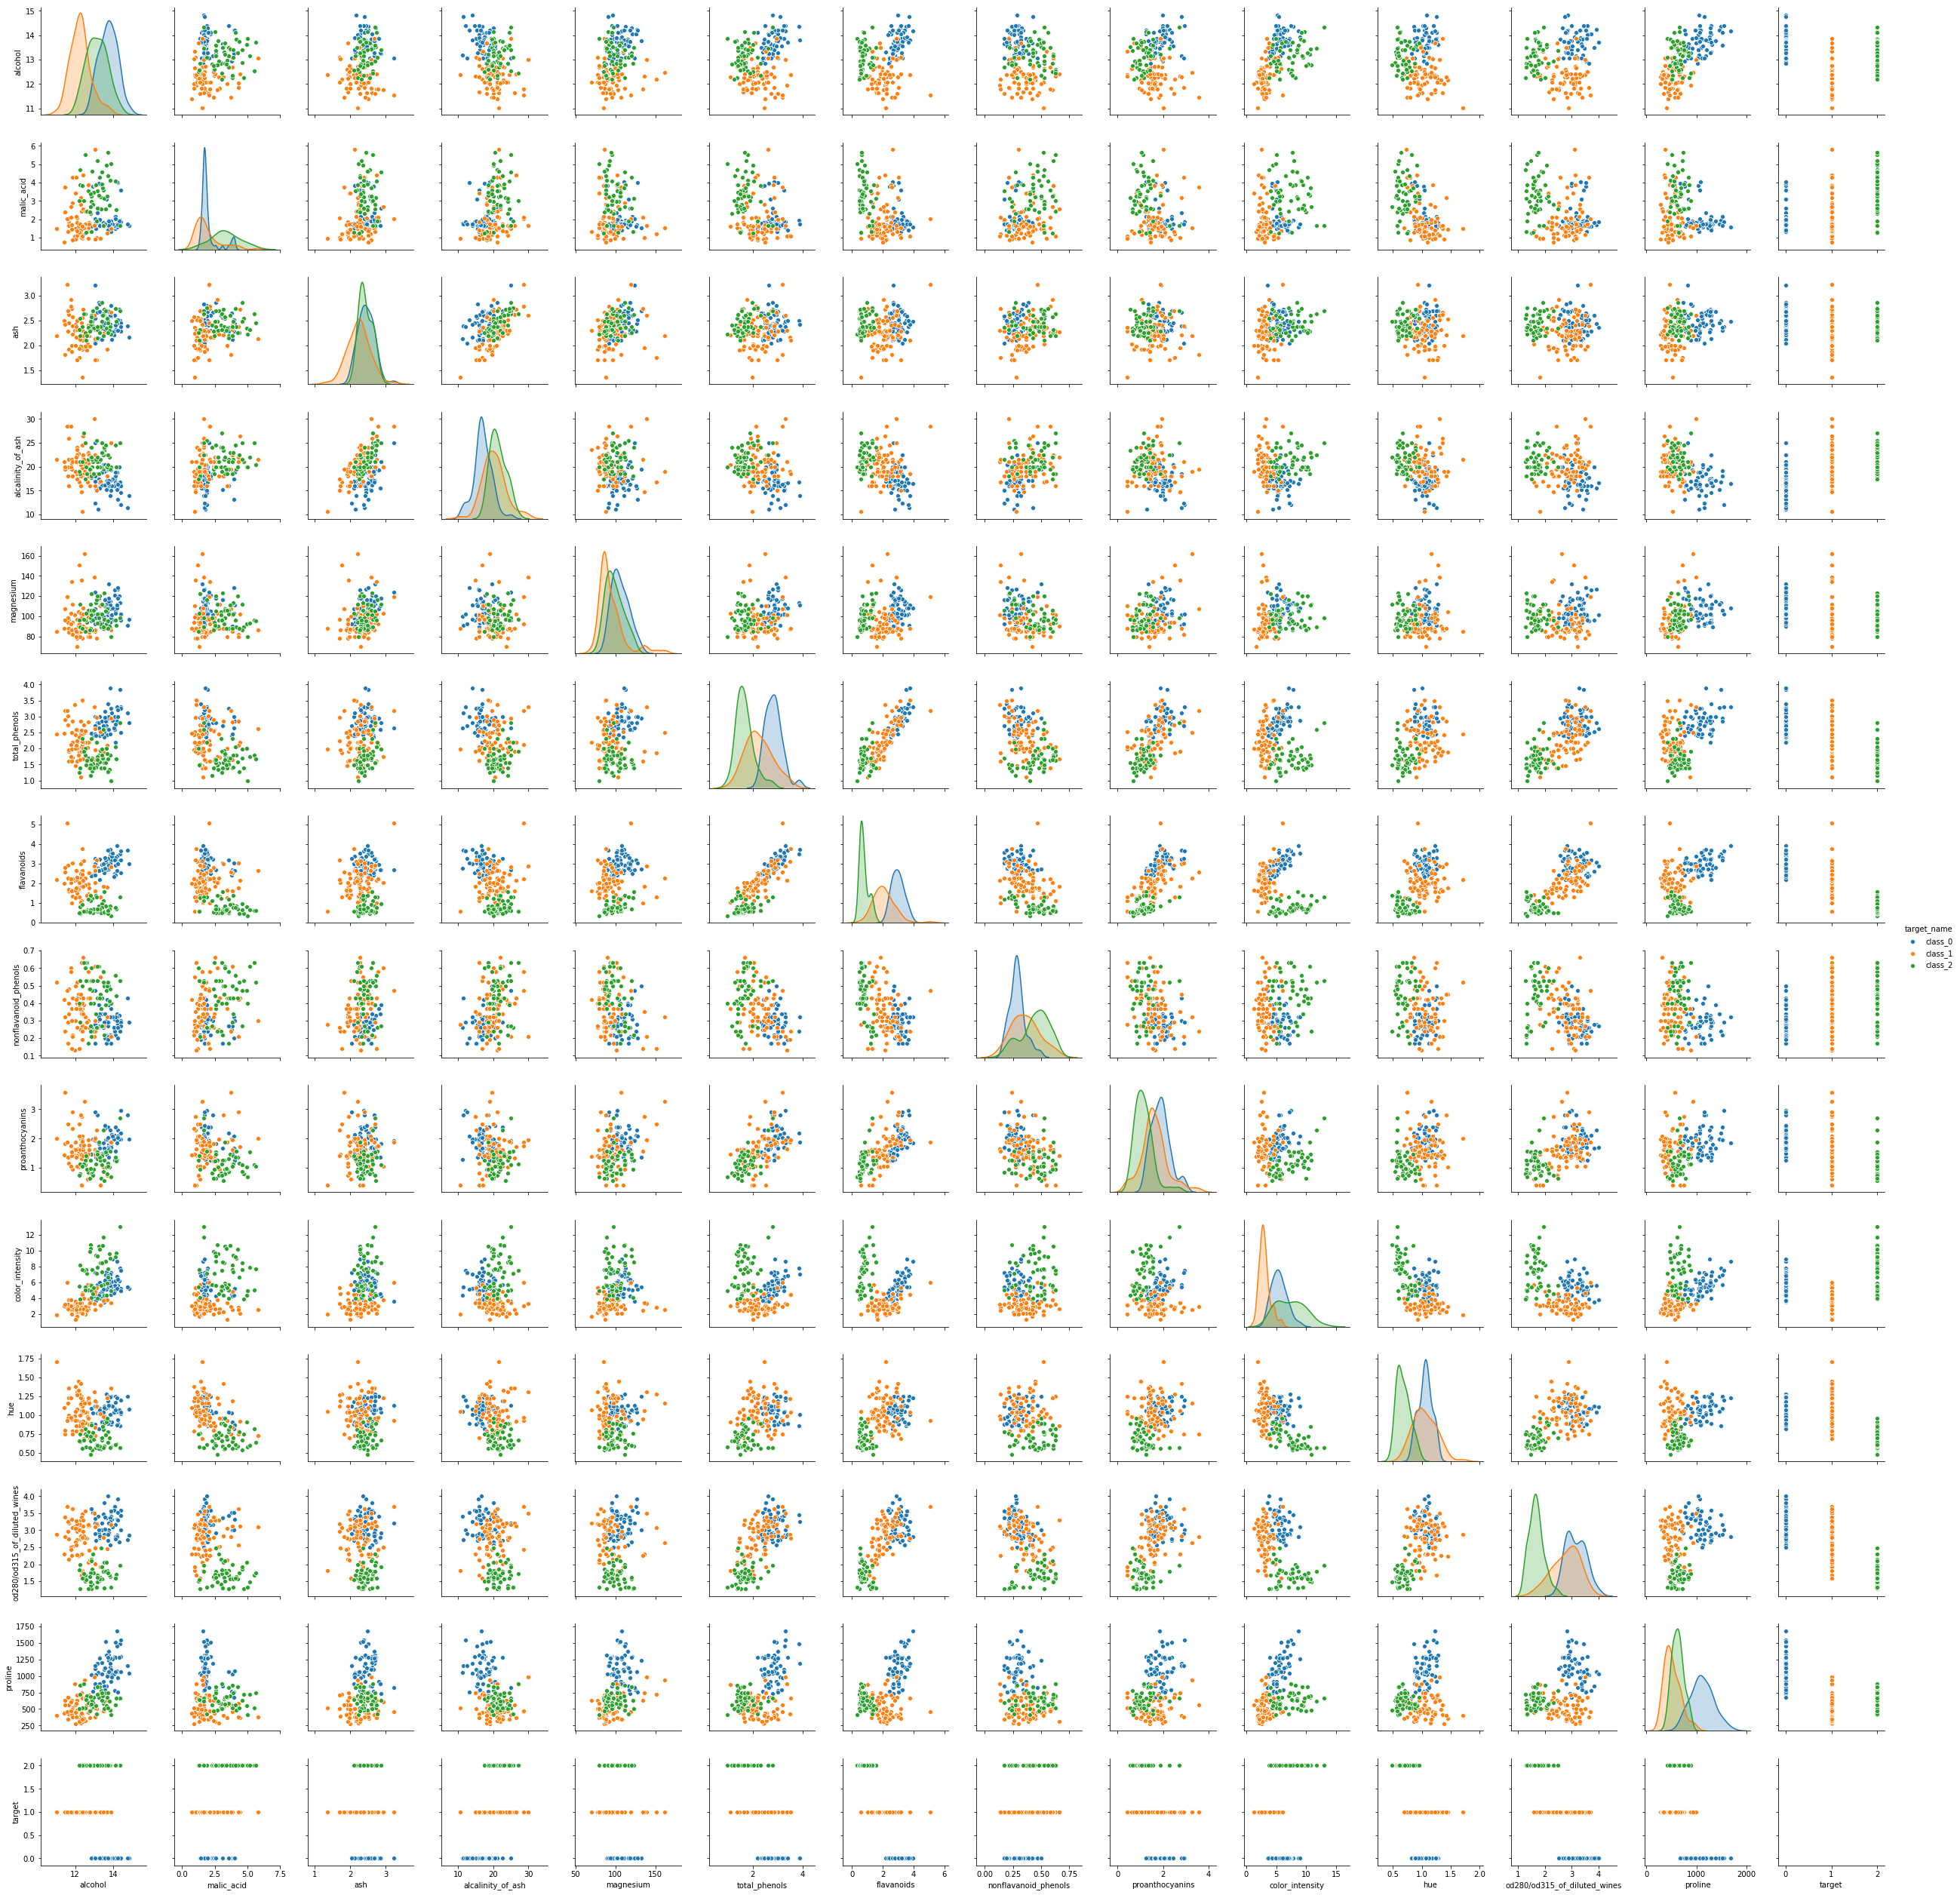

In [44]:
sns.pairplot(df, hue="target_name")

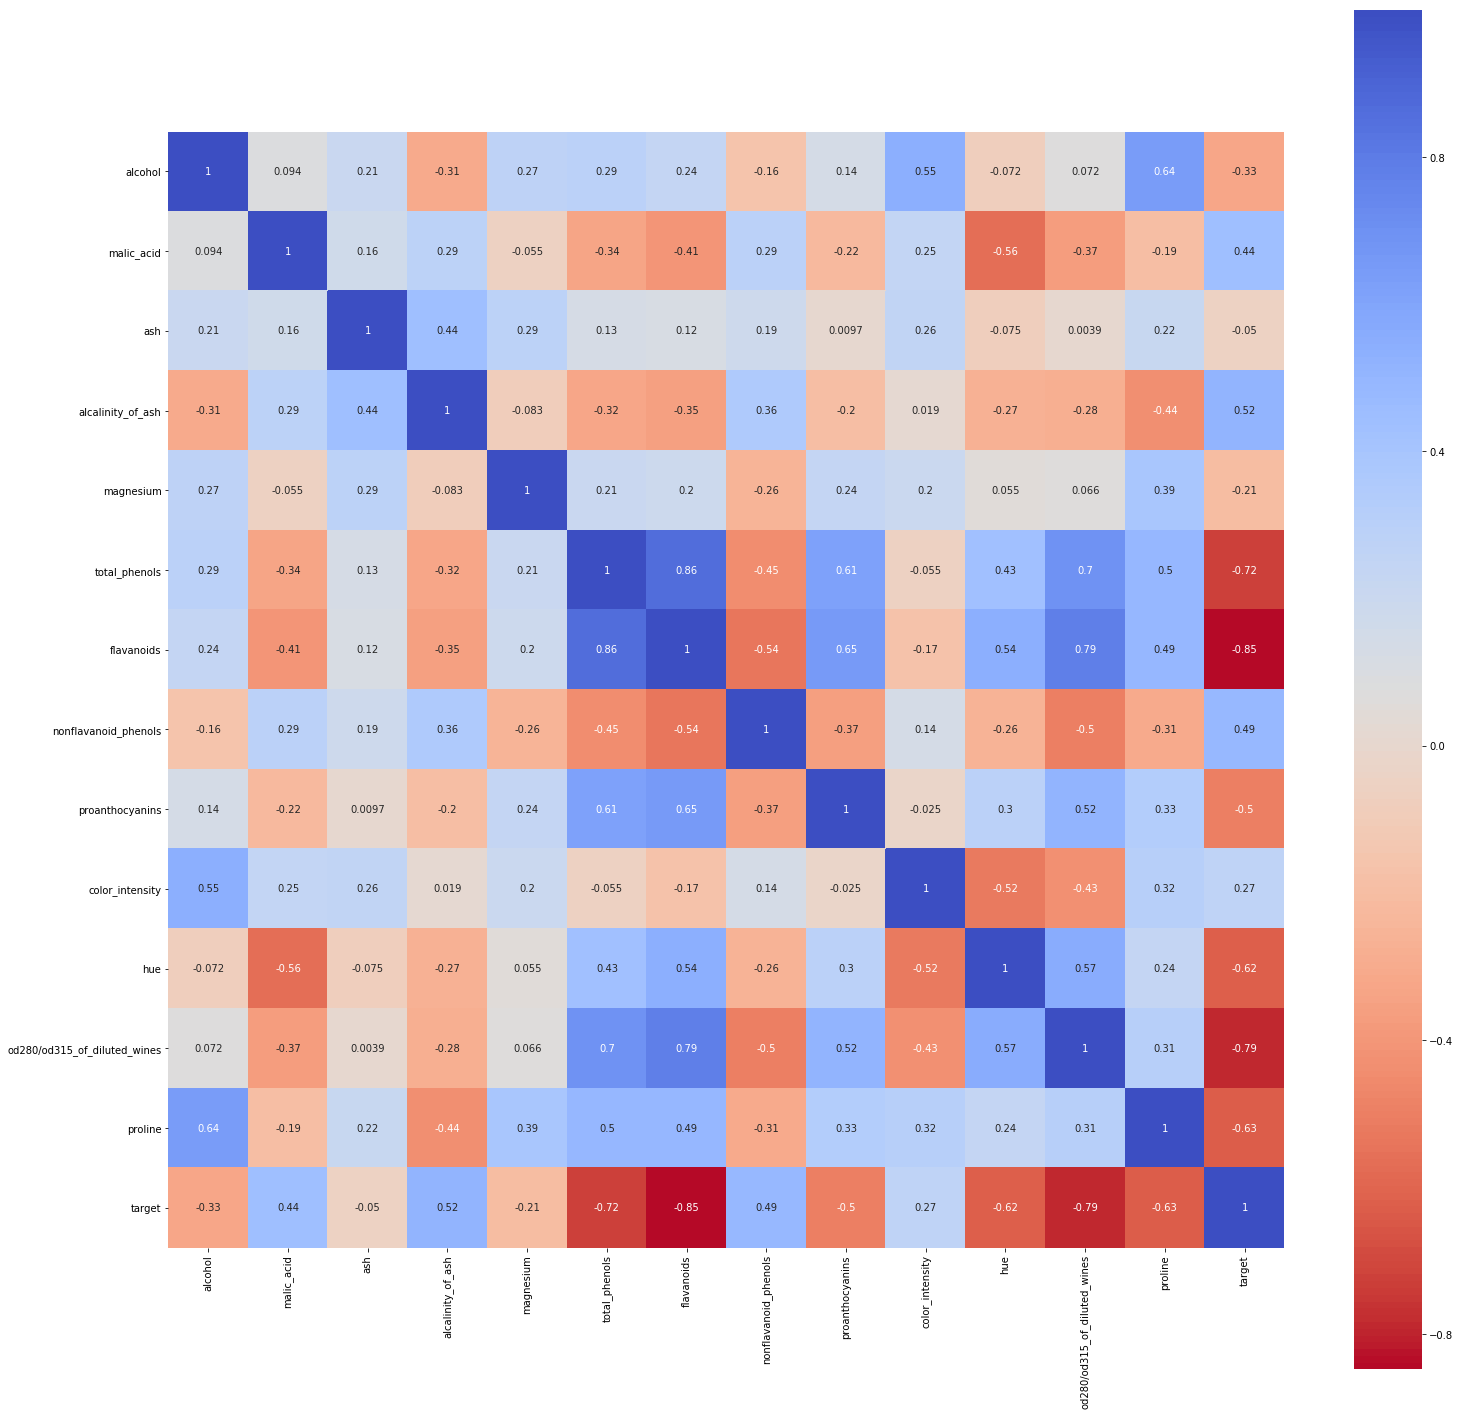

In [48]:
corr = df[df.columns[:-1]].corr()
# _rをつけると逆になる
plt.figure(figsize=(25,25))
cmap = sns.color_palette("coolwarm_r", 200)
sns.heatmap(corr, square=True, annot=True,cmap=cmap)

In [65]:
corr_dummy = corr.copy(deep=True)
corr_dummy=corr_dummy["target"]
corr_dummy = corr_dummy.drop("target")
corr_dummy = np.abs(corr_dummy)
corr_dummy = corr_dummy.sort_values()

print("---")
print(corr_dummy.iloc[-2:])

target_columns = corr_dummy.iloc[-2:].index
target_columns

---
od280/od315_of_diluted_wines    0.788230
flavanoids                      0.847498
Name: target, dtype: float64


Index(['od280/od315_of_diluted_wines', 'flavanoids'], dtype='object')

In [69]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


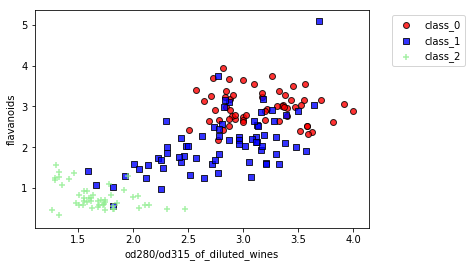

In [68]:
scatter_list=[]
markers=["o", "s", "+","^"]

colors = ["red","blue","lightgreen","gray","yellow","pink","cyan"]
for idx,cl in enumerate(range(3)):
    df_tmp = df[df["target"]==cl]
    X1 = df_tmp[target_columns[0]]
    X2 = df_tmp[target_columns[1]]
    p1 = plt.scatter(X1,X2,alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=wine.target_names[idx],
                edgecolors="black")
    scatter_list.append(p1)
    
plt.xlabel(target_columns[0])
plt.ylabel(target_columns[1])
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
        

In [70]:
# train & test split
X_train,X_test,y_train,y_test = train_test_split(df[df.columns[:-2]],df[df.columns[-2]],test_size=0.3,random_state=1,stratify=df[df.columns[-2]])

In [93]:

def training_result(X,y_true,model,target_names=wine.target_names):
    y_pred = model.predict(X)

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, cmap='Blues',yticklabels=target_names,xticklabels=target_names)
    plt.ylabel("true")
    plt.xlabel("predict")

    print(classification_report(y_true, y_pred,target_names=target_names))

In [80]:
from matplotlib.colors import ListedColormap


def plot_decision_regions0(X1,X2,y,classifiter,label_name_list=None, resolution=0.002):
   
    if label_name_list is None:
        label_name_list = np.unique(y)
    
    # マーカーとカラーマップの準備
    markers = ("s","x","o","^","v")
    colors = ["red","blue","lightgreen","gray","cyan"]
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min ,x1_max = X1.min() - 1 ,X1.max()+1
    x2_min ,x2_max = X2.min() - 1 ,X2.max()+1
    
    # グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution)
                         )
    # 改良が必要だな
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifiter.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    # 予測結果をもとのグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線プロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.legend()

    
    # 軸の範囲設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    scatter_list=[]
    for idx,cl in enumerate(np.unique(y)):
        p1 = plt.scatter(X1[y==cl],X2[y==cl],alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=label_name_list[idx],
                    edgecolors="black")
        scatter_list.append(p1)
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
        
    
def plot_decision_regions(X,y,classifiter,label_name_list=None,resolution=0.002):
    return plot_decision_regions0(X[:,0],X[:,1],y,classifiter,label_name_list=label_name_list ,resolution=resolution)

# 前処理なしのロジスティック回帰

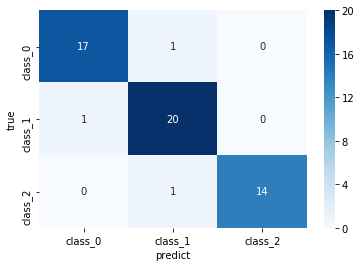

             precision    recall  f1-score   support

    class_0       0.94      0.94      0.94        18
    class_1       0.91      0.95      0.93        21
    class_2       1.00      0.93      0.97        15

avg / total       0.95      0.94      0.94        54



In [72]:
lr_def = LogisticRegression(random_state=1)
lr_def.fit(X_train,y_train)

training_result(X_test,y_test,lr_def)

# 2変数でロジスティック回帰

In [73]:
# train & test split
X_train2,X_test2,y_train2,y_test2 = train_test_split(df[target_columns],df[df.columns[-2]],test_size=0.3,random_state=1,stratify=df[df.columns[-2]])

             precision    recall  f1-score   support

    class_0       0.71      0.83      0.77        18
    class_1       0.81      0.62      0.70        21
    class_2       0.88      1.00      0.94        15

avg / total       0.80      0.80      0.79        54



No handles with labels found to put in legend.


Text(0,0.5,'flavanoids')

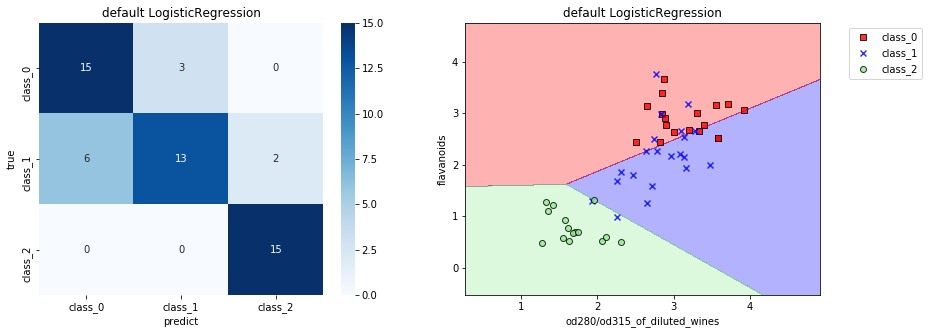

In [98]:
lr_def = LogisticRegression(random_state=1)
lr_def.fit(X_train2,y_train2)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("default LogisticRegression")
training_result(X_test2,y_test2,lr_def)

plt.subplot(1,2,2)
plt.title("default LogisticRegression")
plot_decision_regions0(X_test2[target_columns[0]],X_test2[target_columns[1]],y_test2,lr_def,label_name_list=wine.target_names)
plt.xlabel(target_columns[0])
plt.ylabel(target_columns[1])


             precision    recall  f1-score   support

    class_0       0.95      1.00      0.97        18
    class_1       1.00      0.95      0.98        21
    class_2       1.00      1.00      1.00        15

avg / total       0.98      0.98      0.98        54



No handles with labels found to put in legend.


Text(0,0.5,'PC2')

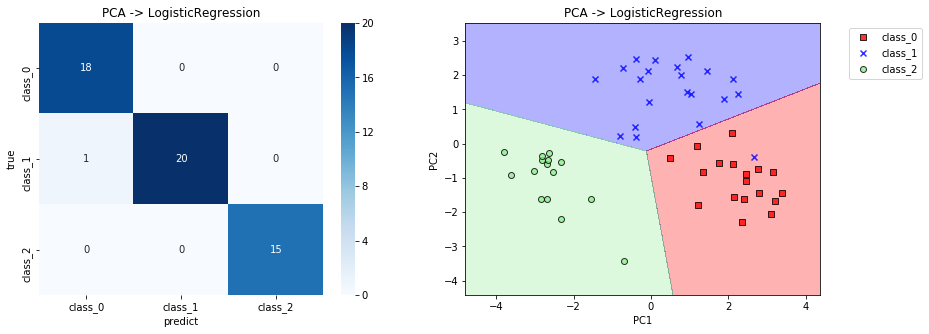

In [99]:
pca = PCA(n_components=2)
lr_pca = LogisticRegression(random_state=1)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr_pca.fit(X_train_pca ,y_train)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("PCA -> LogisticRegression")
training_result(X_test_pca,y_test,lr_pca)
plt.subplot(1,2,2)

plt.title("PCA -> LogisticRegression")
plot_decision_regions0(X_test_pca[:,0],X_test_pca[:,1],
                                  y_test,lr_pca,label_name_list=wine.target_names)
plt.xlabel("PC1")
plt.ylabel("PC2")
